In [179]:
import pandas as pd
import csv

In [180]:
name = ["Team","Win","Lose","Tied","Points","Division Relays","All-Star Relays","Total Points"]
df = pd.read_csv ('../NVSL_Dataset_Analysis/CSV_Data/team_rankings_2023.csv', names = name)
df = df[1:]
df

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points
1,Tuckahoe,5,0,0,1249.0,188.0,644.0,2081.0
2,Overlee,4,1,0,1258.5,202.0,502.0,1962.5
3,Chesterbrook,3,2,0,1145.5,186.0,598.0,1929.5
4,Donaldson Run,2,3,0,1016.5,154.0,454.0,1624.5
5,Highlands Swim,1,4,0,912.5,132.0,291.0,1335.5
...,...,...,...,...,...,...,...,...
98,Newington Forest,4,1,0,1398.0,236.0,0.0,1634.0
99,North Springfield,3,2,0,1156.0,150.0,0.0,1306.0
100,Springfield,2,3,0,1130.0,162.0,0.0,1292.0
101,Pinewood Lake,1,4,0,471.0,50.0,0.0,521.0


In [181]:
df["Championships"] = int(0)
for i in range(1,102,6):
    df.at[i, "Championships"] = 1
df

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships
1,Tuckahoe,5,0,0,1249.0,188.0,644.0,2081.0,1
2,Overlee,4,1,0,1258.5,202.0,502.0,1962.5,0
3,Chesterbrook,3,2,0,1145.5,186.0,598.0,1929.5,0
4,Donaldson Run,2,3,0,1016.5,154.0,454.0,1624.5,0
5,Highlands Swim,1,4,0,912.5,132.0,291.0,1335.5,0
...,...,...,...,...,...,...,...,...,...
98,Newington Forest,4,1,0,1398.0,236.0,0.0,1634.0,0
99,North Springfield,3,2,0,1156.0,150.0,0.0,1306.0,0
100,Springfield,2,3,0,1130.0,162.0,0.0,1292.0,0
101,Pinewood Lake,1,4,0,471.0,50.0,0.0,521.0,0


In [182]:
convert_dict = {"Team": str,
                "Win": int,
               "Lose": int,
               "Tied": int,
               "Points": float,
               "Division Relays": float,
               "All-Star Relays": float,
               "Total Points": float,
               "Championships": int}

df = df.astype(convert_dict)
df.dtypes

Team                object
Win                  int64
Lose                 int64
Tied                 int64
Points             float64
Division Relays    float64
All-Star Relays    float64
Total Points       float64
Championships        int64
dtype: object

In [183]:

for i in range (2022, 2000, -1):
    with open(f'../NVSL_Dataset_Analysis/CSV_Data/team_rankings_{i}.csv', 'r', newline = "\n") as file:
        csv_reader = csv.reader(file, delimiter = ",")
        champs = 1
        for row in csv_reader:
            curr_name = row[0]
            if curr_name != "":
                if champs == 1:
                    df.loc[df["Team"] == curr_name] += ["",int(row[1]), int(row[2]), int(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), 1]
                    champs += 1
                elif champs > 1 and champs < 6:
                    df.loc[df["Team"] == curr_name] += ["",int(row[1]), int(row[2]), int(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), 0]
                    champs += 1
                else:
                    champs = 1
            
                   

In [184]:
df = df.sort_values("Team")
df

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships
89,Annandale,47,40,0,17808.5,2463.0,524.0,20795.5,5
52,Arlington Forest,45,51,0,19900.0,2874.0,582.0,23356.0,3
42,Brandywine,47,35,1,17574.0,2490.0,378.0,20442.0,5
73,Brookfield,47,35,0,16783.0,2396.0,128.0,19307.0,7
96,Broyhill Crest,50,37,0,18138.5,2468.0,0.0,20606.5,1
...,...,...,...,...,...,...,...,...,...
28,Virginia Run,43,37,2,17370.5,2539.0,1998.0,21907.5,1
16,Wakefield Chapel,49,24,1,15845.5,2542.0,3090.0,21477.5,4
54,Walden Glen,51,54,0,21278.0,3286.0,960.0,25524.0,4
55,Waynewood,49,39,0,18614.5,2675.0,1317.0,22606.5,3


In [185]:
df["Win"].mean()

50.3921568627451

In [203]:
df.sort_values("Team")

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
89,Annandale,47,40,0,17808.5,2463.0,524.0,20795.5,5,0.54023,1.175
52,Arlington Forest,45,51,0,19900.0,2874.0,582.0,23356.0,3,0.46875,0.882353
42,Brandywine,47,35,1,17574.0,2490.0,378.0,20442.0,5,0.566265,1.342857
73,Brookfield,47,35,0,16783.0,2396.0,128.0,19307.0,7,0.573171,1.342857
96,Broyhill Crest,50,37,0,18138.5,2468.0,0.0,20606.5,1,0.574713,1.351351
...,...,...,...,...,...,...,...,...,...,...,...
28,Virginia Run,43,37,2,17370.5,2539.0,1998.0,21907.5,1,0.52439,1.162162
16,Wakefield Chapel,49,24,1,15845.5,2542.0,3090.0,21477.5,4,0.662162,2.041667
54,Walden Glen,51,54,0,21278.0,3286.0,960.0,25524.0,4,0.485714,0.944444
55,Waynewood,49,39,0,18614.5,2675.0,1317.0,22606.5,3,0.556818,1.25641


Text(0, 0.5, 'Hospital Name')

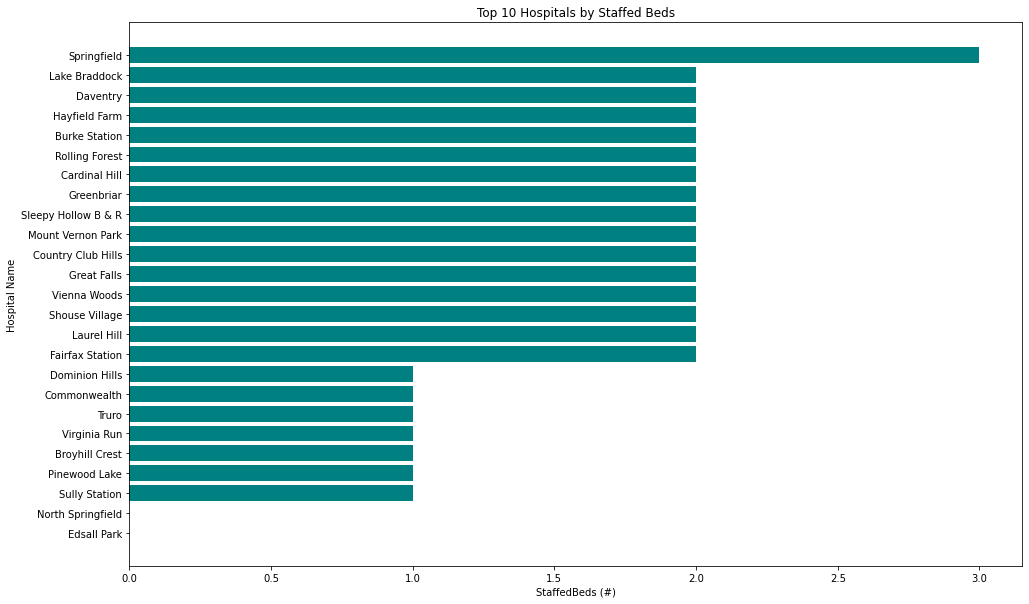

In [187]:
n = 25
df_sorted_champs = df.sort_values("Championships")
plt.figure(figsize=(16,10))
_ = plt.barh(df_sorted_champs[:n]["Team"],df_sorted_champs[:n]["Championships"],color = "teal")
plt.title("Top 10 Hospitals by Staffed Beds")
plt.xlabel("StaffedBeds (#)")
plt.ylabel("Hospital Name")

In [188]:
df.loc[df["Team"] == "Chesterbrook"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships
3,Chesterbrook,95,13,0,26725.5,4129.0,11233.0,42087.5,12


In [189]:
df["Win_Percentage"] = df["Win"]/(df["Win"] + df["Lose"] + df["Tied"])

In [190]:
df["Win:Loss Ratio"] = df["Win"] / df["Lose"]

In [191]:
df.sort_values("Win_Percentage")

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
101,Pinewood Lake,11,42,0,7657.5,850.0,0.0,8507.5,1,0.207547,0.261905
5,Highlands Swim,39,58,1,19480.5,2530.0,4821.0,26831.5,3,0.397959,0.672414
102,Edsall Park,17,24,0,6916.5,614.0,0.0,7530.5,0,0.414634,0.708333
100,Springfield,27,35,0,11711.5,1501.0,170.0,13382.5,3,0.435484,0.771429
81,Hayfield Farm,41,48,3,18477.0,2780.0,1037.0,22294.0,2,0.445652,0.854167
...,...,...,...,...,...,...,...,...,...,...,...
9,Langley,53,24,2,17208.0,2565.0,2114.0,21887.0,4,0.670886,2.208333
14,High Point Pool,63,29,1,20140.5,2991.0,1951.0,25082.5,6,0.677419,2.172414
7,Old Keene Mill,60,26,2,19250.5,2716.0,1506.0,23472.5,7,0.681818,2.307692
2,Overlee,83,20,0,24616.5,3767.0,10604.3,38987.8,7,0.805825,4.15


In [192]:
df["Win_Percentage"].mean()

0.5626346848532721

In [193]:
df.loc[df["Team"] == "Tuckahoe"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
1,Tuckahoe,61,40,2,22410.0,3226.0,8349.0,33985.0,3,0.592233,1.525


In [194]:
df.loc[df["Team"] == "Walden Glen"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
54,Walden Glen,51,54,0,21278.0,3286.0,960.0,25524.0,4,0.485714,0.944444


In [195]:
df.loc[df["Team"] == "Wakefield Chapel"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
16,Wakefield Chapel,49,24,1,15845.5,2542.0,3090.0,21477.5,4,0.662162,2.041667


In [196]:
df.loc[df["Team"] == "Rutherford"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
90,Rutherford,47,45,0,18648.0,3020.0,650.0,22318.0,4,0.51087,1.044444


In [197]:
df.loc[df["Team"] == "Rolling Hills"]

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
46,Rolling Hills,50,37,1,18855.0,2545.0,722.0,22122.0,4,0.568182,1.351351


In [198]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Hospital Name')

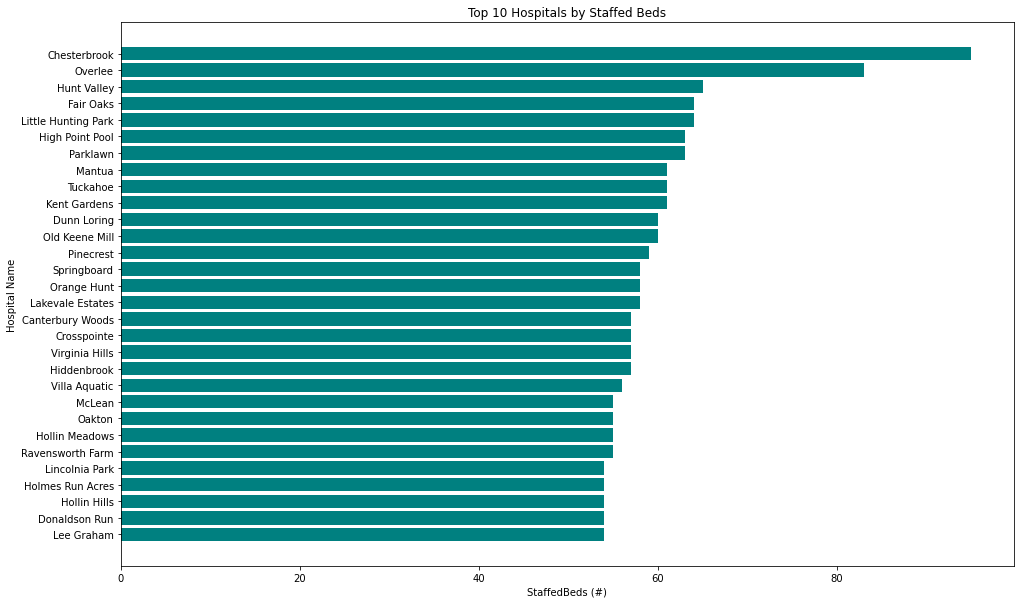

In [199]:
n = 30
df_sorted_wins = df.sort_values("Win")
plt.figure(figsize=(16,10))
_ = plt.barh(df_sorted_wins[-n:]["Team"],df_sorted_wins[-n:]["Win"],color = "teal")
plt.title("Top 10 Hospitals by Staffed Beds")
plt.xlabel("StaffedBeds (#)")
plt.ylabel("Hospital Name")

Text(0, 0.5, 'Hospital Name')

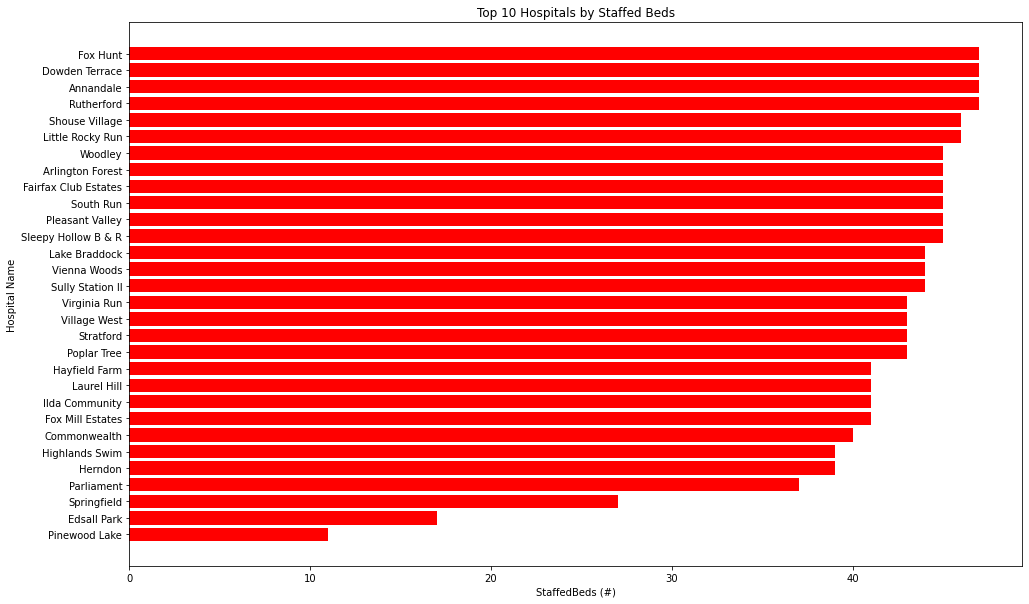

In [200]:
n = 30
df_sorted_wins = df.sort_values("Win")
plt.figure(figsize=(16,10))
_ = plt.barh(df_sorted_wins[:n]["Team"],df_sorted_wins[:n]["Win"],color = "red")
plt.title("Top 10 Hospitals by Staffed Beds")
plt.xlabel("StaffedBeds (#)")
plt.ylabel("Hospital Name")

Text(0, 0.5, 'Hospital Name')

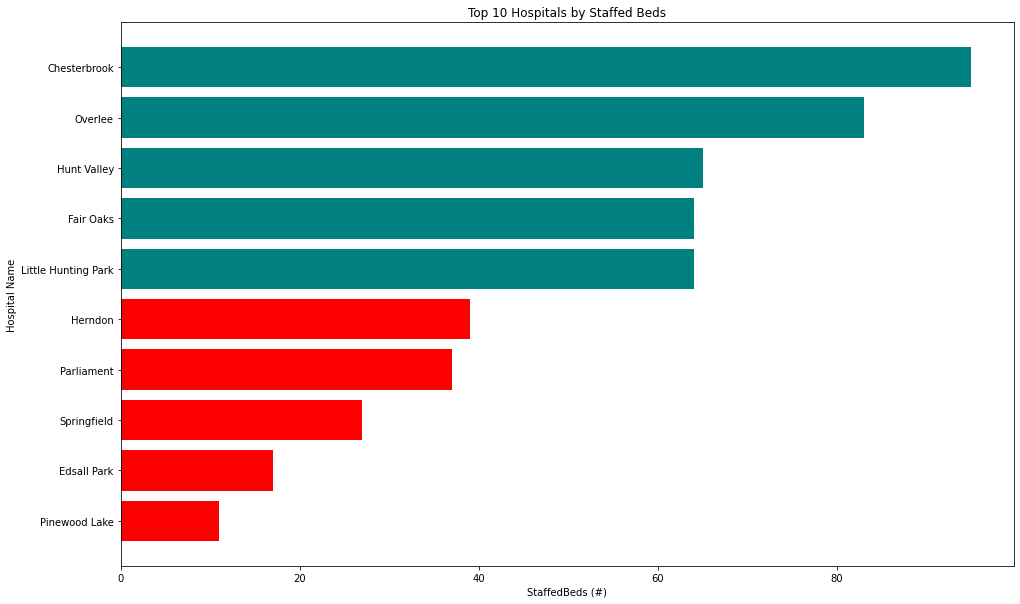

In [201]:
n = 5
df_sorted_wins = df.sort_values("Win")
plt.figure(figsize=(16,10))
_ = plt.barh(df_sorted_wins[:n]["Team"],df_sorted_wins[:n]["Win"],color = "red")
_ = plt.barh(df_sorted_wins[-n:]["Team"],df_sorted_wins[-n:]["Win"],color = "teal")
plt.title("Top 10 Hospitals by Staffed Beds")
plt.xlabel("StaffedBeds (#)")
plt.ylabel("Hospital Name")

In [202]:
df_sorted_champs = df.sort_values("Championships")
df_sorted_champs

,Team,Win,Lose,Tied,Points,Division Relays,All-Star Relays,Total Points,Championships,Win_Percentage,Win:Loss Ratio
102,Edsall Park,17,24,0,6916.5,614.0,0.0,7530.5,0,0.414634,0.708333
99,North Springfield,48,40,0,18415.0,2471.0,0.0,20886.0,0,0.545455,1.2
50,Sully Station,49,38,0,18268.5,2804.0,2261.0,23333.5,1,0.563218,1.289474
101,Pinewood Lake,11,42,0,7657.5,850.0,0.0,8507.5,1,0.207547,0.261905
96,Broyhill Crest,50,37,0,18138.5,2468.0,0.0,20606.5,1,0.574713,1.351351
...,...,...,...,...,...,...,...,...,...,...,...
83,Somerset-Olde Creek,49,42,2,19424.5,2832.0,901.0,23157.5,7,0.526882,1.166667
7,Old Keene Mill,60,26,2,19250.5,2716.0,1506.0,23472.5,7,0.681818,2.307692
66,Fox Mill Woods,50,36,1,18375.5,2756.0,1603.0,22734.5,7,0.574713,1.388889
61,Hollin Meadows,55,33,4,19396.0,2873.0,719.0,22988.0,7,0.597826,1.666667
